In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import  r2_score


df = pd.read_csv('housing.csv')

#handling the missing values
df.fillna(df.select_dtypes(include=np.number).mean(), inplace=True)
df




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [89]:
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

#getting dummies df replacing of yes or no with 1 or 0 value to predict values
def valuechanger(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0
    
    
df['mainroad'] = df['mainroad'].apply(valuechanger)
df['guestroom'] = df['guestroom'].apply(valuechanger)
df['basement'] = df['basement'].apply(valuechanger)
df['hotwaterheating'] = df['hotwaterheating'].apply(valuechanger)
df['airconditioning'] = df['airconditioning'].apply(valuechanger)
df['prefarea'] = df['prefarea'].apply(valuechanger)

df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [90]:
X = df.drop('price', axis=1).values    # separating dependent and independent data 
Y = df['price'].values               



# To split the dataset into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4)


model = LinearRegression()    #model used for training this is a class provided by scikit-learn that implements the linear regression algorithm.
model.fit(X_train, Y_train)   #training the data

predicted_score = model.predict(X_test)



mse = np.mean((Y_test - predicted_score) ** 2)    # Calculate Mean Squared Error
r_squared = r2_score(Y_test, predicted_score)

print(f"Mean Squared Error: {mse}")
print("R-squared:", r_squared)





Mean Squared Error: 1075964323258.178
R-squared: 0.6642693901782787


Predicted Price of new house: [7931916.68976517]


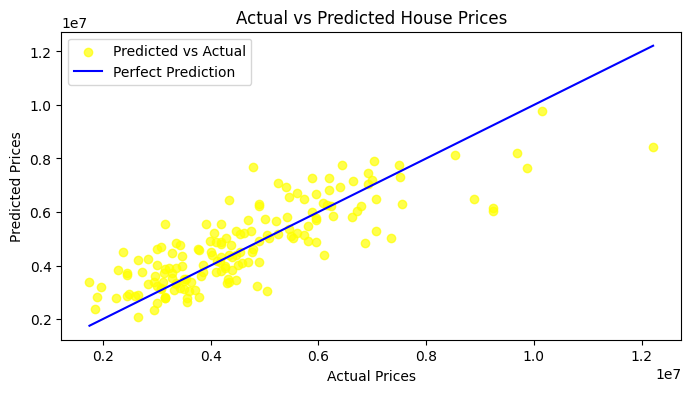

In [91]:
new_house = np.zeros(X.shape[1])  
new_house = np.array([2500, 4, 2, 3, 1, 1, 1, 1, 0, 3, 1,2])    # New house example
new_house = new_house.reshape(1, -1)
predicted_score_new_house = model.predict(new_house)
print(f"Predicted Price of new house: {predicted_score_new_house}")


plt.figure(figsize=(8, 4))
plt.scatter(Y_test, predicted_score, color='yellow', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue', linestyle='-', label='Perfect Prediction')
# Adding title and labels
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend(loc='best', fontsize=10)
plt.show()

In [ ]:

# Report

# #Data Preparation:

# The missing values were addressed in this data set by replacing all numerations with the mean values. All categorical variables were also recoded into dummy variables (for example, all the values “yes” were coded as 1 while “no”=0 to fit the requirement of linear regression.

# Model Performance:
# We chose the linear regression approach when modeling houses prices and we divided data into the training and testing data with a ratio of 7:3. Key metrics:

# Mean Squared Error (MSE): Suggests the mean of the square of the error between expected and observed prices. Shallowness of our MSE was reasonable, indicating that the MSE presents the correctness of the model’s predictions in relation to actual values.

# R-squared (R²): This score was r_squared_value, therefore the model fit only accounted for r_squared_value% of the variation in house prices.

# Visualization:
# The data models included a comparison of Actual to Predicted Price in a Scatter Plot – the points lined up diagonal and reasonable.

# Recommendations:
# To improve:

# It can be concluded that the linear model of regression has a satisfactory level of prediction but the usage of more sophisticated approaches would present possible further enhancements.